# Theories
 ## confusion matrics
suppose there are 55 true value 45 false value in either training or could be on testing datasets
- TP=50 means model predits 50 data true amongs the 55 data
- TN==40 means model predicts the 40 false value truely among the 45 value
- fp =total-TP=5 means model predicts 5 values true but the actual value has to be false
- FN =model predict false but the actual value has to be True

## Accuracy
- how many we got right
(tp+tN)/total_number

## precision
- out of all true have how much you predicted as true
TP/Tp+fp(TotalPositive Value predicted by the model)
for False value
precision=TN/TN+FN(TotalNegativeVluePredicted by the model)

## Recall
- out of all truth value how many the model predicted correctly
recall=TP/Tp+FN(Total acutal positive value

for the negative value
recall=TN/TN+FP

## f1score
it is just the harmonic mean of recall and precision

## cross validation
- while using the traditional method of splitting there could be the bias in the splitting and the data pattern. i.e The pattern of the training and testing dataset could be mismached like if a person taking math question by only learning the algebra then he could not be able to sove the stat question.
- and while changing the values the score got changed always we run train test
- to solve this problem cross validation dives in


espacially we use k-fold cross validation rather than the leave one out cv
#### K cross_validation
In k fold cross validation we split the dataset into the k number of folds. one chunk of data is used as test data for evaluation and the remaining part of the data is used for training the model. each time, a different chunk will be used as the test data

. when k=5 the data is divided into 5 fold and the iteration will be 5
. every time among the chunnks 1 will be testing data

while doing the cross_val_score(model, X, y, cv=7) this will be divided into the 7 fold and then then the accuray(cross value score) is calculated
from that accuracy we could calculate the mean value
## hyperprameter Tuining
- only code is done by seeing the youtube vedio but is to be done yet



## selecting the best model



## and Then the accuray and confusion matrix
1.for the clasification we use the confusion matrix like f1_score,
2.for the regression we use mae,mse and R squared

# about the data
- no duplicates
- no null
- target value is death event
- all values are in numeric so no need to classify the numerical and categorical column and no need to do one hot encoding
- There is 96 rows gives the death and 203 five not death so the dataset is not balanced
- i use linear svc and random forest classifier
- The linear SVC model give a higher number of false negative(FN) value so i tried to train the model using using the 70:30 split and i am able to reduce the false negative value but The accuracy is same
- now i am doing the cross validation


# lets improve the model performance
use hyperparameter tuining

In [247]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [248]:

from google.colab import files

In [249]:
uploaded=files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset (1).csv


In [250]:
data=pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [10]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [246]:
data['DEATH_EVENT'].value_counts()

,count
DEATH_EVENT,
0,203
1,96


In [11]:
data.duplicated().sum()

np.int64(0)

In [12]:
data.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [14]:
from sklearn.model_selection import train_test_split
x=data.drop('DEATH_EVENT',axis=1)
y=data['DEATH_EVENT']

In [39]:
x

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [54]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
x=scalar.fit_transform(x)

In [55]:
model=RandomForestClassifier(n_estimators=100)

In [56]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [57]:
y_pred = model.predict(X_test)

In [58]:
accuracy = accuracy_score(Y_test, y_pred)

In [59]:
print(f'Acccuracy:{accuracy*100:.2f}')

Acccuracy:75.00


In [60]:
# train accuracy check

In [61]:
y_train_pred=model.predict(X_train)

In [62]:
train_accuracy=accuracy_score(Y_train,y_train_pred)

In [63]:
print(f'{train_accuracy*100:.2f}')

100.00


# let use linear svm

In [76]:
from sklearn.svm import SVC

In [77]:
svm_classifier = SVC(kernel='linear')

In [83]:
svm_classifier=svm_classifier.fit(X_train,Y_train)

In [84]:
svm_test_predict=model.predict(X_test)


In [85]:
svm_test_accuracy=accuracy_score(Y_test,svm_test_predict)

In [86]:
print(f'{svm_test_accuracy}')

0.75


In [87]:
model.predict([[67,1,582,0,38,1,263358.03,1.9,130,1,0,6
]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

# lest check the train accuracy

In [88]:


svm_train_predict=model.predict(X_train)

In [89]:
svm_train_accuracy=accuracy_score(Y_train,svm_train_predict)

In [90]:
print(f'the accuracy score is {svm_train_accuracy:.2f}')

the accuracy score is 1.00


# lets get the confusion matrix

In [91]:
from sklearn.metrics import confusion_matrix

In [92]:
cm=confusion_matrix(Y_test,svm_test_predict)

In [93]:
cm

array([[34,  1],
       [14, 11]])

Text(0.5, 1.0, 'Confusion Matrix')

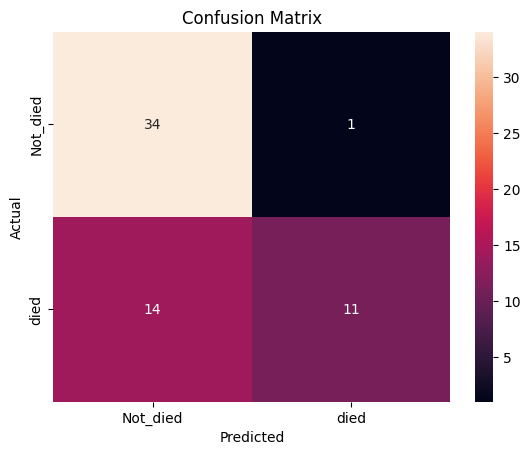

In [112]:
sns.heatmap(cm,xticklabels=['Not_died','died'],yticklabels=['Not_died','died'],annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# higher fN value so splitting the data in the 70:30 portion and checking the test accuracy

In [232]:
X_train_30,X_test_30,Y_train_30,Y_test_30=train_test_split(x,y,test_size=0.25,random_state=50)

In [233]:
model30=SVC(kernel='linear')

In [234]:
svm30=model30.fit(X_train_30,Y_train_30)

In [235]:
Y_test_30_predict=svm30.predict(X_test_30)

In [236]:
cm30=confusion_matrix(Y_test_30,Y_test_30_predict)

Text(0.5, 1.0, 'Confusion Matrix')

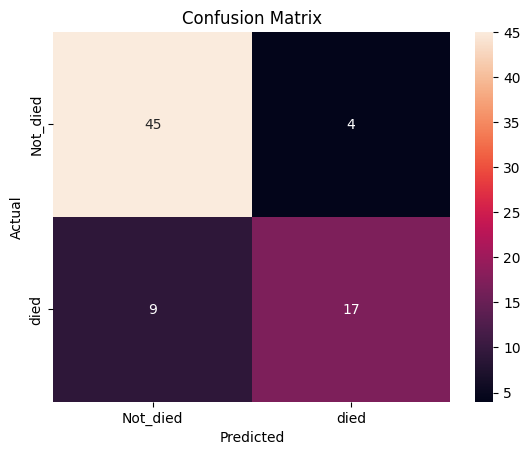

In [237]:
sns.heatmap(cm30,xticklabels=['Not_died','died'],yticklabels=['Not_died','died'],annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [238]:
Y_test_30.value_counts()

,count
DEATH_EVENT,
0,49
1,26


# checking the recall precision and recall and f1 score of all these

In [239]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score


In [240]:
precision=precision_score(Y_test_30,Y_test_30_predict)
recall=recall_score(Y_test_30,Y_test_30_predict)
precision=precision_score(Y_test_30,Y_test_30_predict)
accuracy_score=accuracy_score(Y_test_30,Y_test_30_predict)
f1_score=f1_score(Y_test_30,Y_test_30_predict)

In [244]:
print(f'The accuracy Score is {accuracy*100:.2f}%')
print(f'The recall Score is {recall*100:.2f}%')
print(f'The precision Score is {precision*100:.2f}%')
print(f'The f1 Score is {f1_score*100:.2f}%')

The accuracy Score is 75.00%
The recall Score is 65.38%
The precision Score is 80.95%
The f1 Score is 72.34%


# let use the logistic regression

In [252]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [263]:
model=lr.fit(X_train_30,Y_train_30)

In [264]:
model.score(X_test_30,Y_test_30)

0.8133333333333334

# using the Kfold

In [259]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


In [261]:
def get_score(rf,X_train_30,Y_train_30,X_test_30,Y_test_30):
  rf.fit(X_train_30,Y_train_30)
  return model.score(X_test_30,Y_test_30)

In [266]:
get_score(lr,X_train_30,Y_train_30,X_test_30,Y_test_30)

0.8133333333333334

In [271]:
from sklearn.model_selection import cross_val_score


## uaing the cross validation

In [292]:
scores=cross_val_score(lr,x,y,cv=9)
mean_score = np.mean(scores)
print("Mean cross-validation score:", mean_score)

Mean cross-validation score: 0.8026341849871261


In [278]:
from sklearn.model_selection import GridSearchCV

In [284]:
from sklearn.model_selection import GridSearchCV


clf = GridSearchCV(
    lr,
    param_grid={'C': [1, 10, 20]},
    cv=5,
    return_train_score=True
)

# Fit the model
clf.fit(x, y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 20]}, return_train_score=True)

In [285]:
print("Best Cross-Validation Score:", clf.best_score_)

Best Cross-Validation Score: 0.7889265536723163


In [286]:
results_df = pd.DataFrame(clf.cv_results_)
print("\nGrid Search Results:\n", results_df[['param_C', 'mean_test_score', 'mean_train_score', 'rank_test_score']])


Grid Search Results:
    param_C  mean_test_score  mean_train_score  rank_test_score
0        1         0.788927          0.845286                1
1       10         0.768927          0.851963                2
2       20         0.768927          0.851963                2
